In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv('D:/CLG/NM/ecommerce_customer_dataset.csv')
df

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,Purchase_Frequency,Last_Transaction_Days,Preferred_Category
0,1,56.0,Male,71663.0,96.0,11,75,Grocery
1,2,69.0,Male,35708.0,27.0,5,217,Grocery
2,3,46.0,Male,111906.0,63.0,1,277,NaN
3,4,32.0,Male,69811.0,96.0,8,249,Sports
4,5,60.0,Male,22811.0,68.0,12,164,Clothing
...,...,...,...,...,...,...,...,...
100,84,32.0,Female,90091.0,62.0,13,321,Electronics
101,54,43.0,Male,52711.0,8.0,10,42,Clothing
102,71,NaN,Male,110272.0,19.0,1,7,Sports
103,46,26.0,Female,71407.0,85.0,5,25,Clothing


In [156]:
df.isna().sum()


Customer_ID              0
Age                      6
Gender                   0
Annual_Income            5
Spending_Score           5
Purchase_Frequency       0
Last_Transaction_Days    0
Preferred_Category       5
dtype: int64

In [158]:
df['Age'] = df['Age'].fillna(df['Age'].mean()).astype(int)
df['Age']

0      56
1      69
2      46
3      32
4      60
       ..
100    32
101    43
102    43
103    26
104    38
Name: Age, Length: 105, dtype: int32

In [160]:
df.isna().sum()

Customer_ID              0
Age                      0
Gender                   0
Annual_Income            5
Spending_Score           5
Purchase_Frequency       0
Last_Transaction_Days    0
Preferred_Category       5
dtype: int64

In [162]:
ai1 = df['Annual_Income'].mean()
ai2 = df['Annual_Income'].median()
pf1 = df['Spending_Score'].mean()
pf2 = df['Spending_Score'].median()
print(ai1, ai2, pf1, pf2)

65157.76 66528.5 51.49 50.5


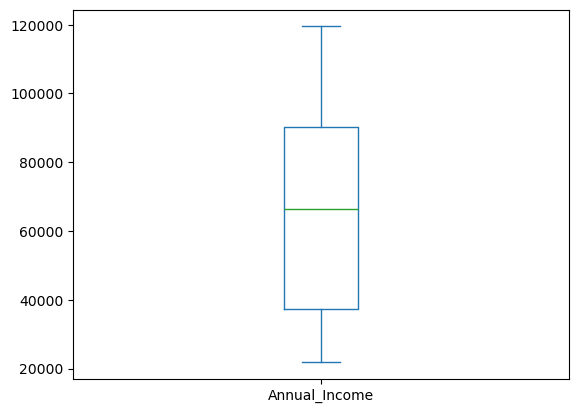

In [164]:
df['Annual_Income'].plot(kind='box')
plt.show()

In [166]:
print(df['Spending_Score'].skew())

0.11834065314110376


In [168]:
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].mean()).astype(int)
print(df['Annual_Income'].isna().sum())
df['Spending_Score'] = df['Spending_Score'].fillna(df['Spending_Score'].mean()).astype(int)
print(df['Spending_Score'].isna().sum())

0
0


In [170]:
df['Preferred_Category'] = df['Preferred_Category'].fillna(df['Preferred_Category'].mode()[0])
df['Preferred_Category'].isna().sum()

0

In [172]:
df

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,Purchase_Frequency,Last_Transaction_Days,Preferred_Category
0,1,56,Male,71663,96,11,75,Grocery
1,2,69,Male,35708,27,5,217,Grocery
2,3,46,Male,111906,63,1,277,Electronics
3,4,32,Male,69811,96,8,249,Sports
4,5,60,Male,22811,68,12,164,Clothing
...,...,...,...,...,...,...,...,...
100,84,32,Female,90091,62,13,321,Electronics
101,54,43,Male,52711,8,10,42,Clothing
102,71,43,Male,110272,19,1,7,Sports
103,46,26,Female,71407,85,5,25,Clothing


In [174]:
df.drop_duplicates()

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,Purchase_Frequency,Last_Transaction_Days,Preferred_Category
0,1,56,Male,71663,96,11,75,Grocery
1,2,69,Male,35708,27,5,217,Grocery
2,3,46,Male,111906,63,1,277,Electronics
3,4,32,Male,69811,96,8,249,Sports
4,5,60,Male,22811,68,12,164,Clothing
...,...,...,...,...,...,...,...,...
95,96,42,Male,39738,51,9,182,Electronics
96,97,62,Female,50746,41,7,167,Clothing
97,98,58,Female,69377,69,4,91,Electronics
98,99,46,Male,68404,14,18,202,Grocery


In [176]:
#Min-Max Scaling of Annual_Income and Spending_Score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled['Annual_Income'] = scaler.fit_transform(df[['Annual_Income']])
df_scaled['Spending_Score'] = scaler.fit_transform(df[['Spending_Score']])
df_scaled

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,Purchase_Frequency,Last_Transaction_Days,Preferred_Category
0,1,56,Male,0.510244,0.978947,11,75,Grocery
1,2,69,Male,0.142305,0.252632,5,217,Grocery
2,3,46,Male,0.922063,0.631579,1,277,Electronics
3,4,32,Male,0.491291,0.978947,8,249,Sports
4,5,60,Male,0.010325,0.684211,12,164,Clothing
...,...,...,...,...,...,...,...,...
100,84,32,Female,0.698823,0.621053,13,321,Electronics
101,54,43,Male,0.316302,0.052632,10,42,Clothing
102,71,43,Male,0.905342,0.168421,1,7,Sports
103,46,26,Female,0.507624,0.863158,5,25,Clothing


In [178]:
#Z-score Normalization of Purchase_Frequency
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled['Purchase_Frequency'] = scaler.fit_transform(df[['Purchase_Frequency']])
df_scaled

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,Purchase_Frequency,Last_Transaction_Days,Preferred_Category
0,1,56,Male,0.510244,0.978947,0.251094,75,Grocery
1,2,69,Male,0.142305,0.252632,-0.782824,217,Grocery
2,3,46,Male,0.922063,0.631579,-1.472103,277,Electronics
3,4,32,Male,0.491291,0.978947,-0.265865,249,Sports
4,5,60,Male,0.010325,0.684211,0.423414,164,Clothing
...,...,...,...,...,...,...,...,...
100,84,32,Female,0.698823,0.621053,0.595734,321,Electronics
101,54,43,Male,0.316302,0.052632,0.078775,42,Clothing
102,71,43,Male,0.905342,0.168421,-1.472103,7,Sports
103,46,26,Female,0.507624,0.863158,-0.782824,25,Clothing


In [180]:
df.isna().sum()

Customer_ID              0
Age                      0
Gender                   0
Annual_Income            0
Spending_Score           0
Purchase_Frequency       0
Last_Transaction_Days    0
Preferred_Category       0
dtype: int64

In [188]:
#Label encoding of Preferred_Category 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_encoded = df.copy() 
df['Preferred_Category'] = encoder.fit_transform(df['Preferred_Category'])
df

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,Purchase_Frequency,Last_Transaction_Days,Preferred_Category
0,1,56,Male,71663,96,11,75,3
1,2,69,Male,35708,27,5,217,3
2,3,46,Male,111906,63,1,277,2
3,4,32,Male,69811,96,8,249,4
4,5,60,Male,22811,68,12,164,1
...,...,...,...,...,...,...,...,...
100,84,32,Female,90091,62,13,321,2
101,54,43,Male,52711,8,10,42,1
102,71,43,Male,110272,19,1,7,4
103,46,26,Female,71407,85,5,25,1


In [190]:
#One-hot Encoding of Gender
df_encoded= pd.get_dummies(df_encoded,columns = ['Gender'], drop_first=True)
df_encoded[["Gender_Male", "Gender_Other"]] = df_encoded[["Gender_Male", "Gender_Other"]].astype(int)
df_encoded

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Last_Transaction_Days,Preferred_Category,Gender_Male,Gender_Other
0,1,56,71663,96,11,75,3,1,0
1,2,69,35708,27,5,217,3,1,0
2,3,46,111906,63,1,277,2,1,0
3,4,32,69811,96,8,249,4,1,0
4,5,60,22811,68,12,164,1,1,0
...,...,...,...,...,...,...,...,...,...
100,84,32,90091,62,13,321,2,0,0
101,54,43,52711,8,10,42,1,1,0
102,71,43,110272,19,1,7,4,1,0
103,46,26,71407,85,5,25,1,0,0


In [200]:
#Feature Engineering: Creating a Customer Loyatly Score
df_ls = df.copy()
df_ls["Loyalty_Score"] = df_ls["Spending_Score"] * 0.7 + df_ls["Purchase_Frequency"] * 0.3
mins = df_ls["Loyalty_Score"].min()
maxs = df_ls["Loyalty_Score"].max()
bins = sorted([mins - 0.1, 33, 66, maxs + 0.1])
labels = ["Low", "Medium", "High"]
df_ls["Customer_Loyalty_Score"] = pd.cut(df_ls["Loyalty_Score"], bins=bins, labels=labels)
df_ls

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,Purchase_Frequency,Last_Transaction_Days,Preferred_Category,Loyalty_Score,Customer_Loyalty_Score
0,1,56,Male,71663,96,11,75,3,70.5,High
1,2,69,Male,35708,27,5,217,3,20.4,Low
2,3,46,Male,111906,63,1,277,2,44.4,Medium
3,4,32,Male,69811,96,8,249,4,69.6,High
4,5,60,Male,22811,68,12,164,1,51.2,Medium
...,...,...,...,...,...,...,...,...,...,...
100,84,32,Female,90091,62,13,321,2,47.3,Medium
101,54,43,Male,52711,8,10,42,1,8.6,Low
102,71,43,Male,110272,19,1,7,4,13.6,Low
103,46,26,Female,71407,85,5,25,1,61.0,Medium


In [202]:
#Binning
df_bin = df_ls.copy()
df_bin['Income_Level'] = pd.qcut(df_bin['Annual_Income'], q = 3, labels=['Low','Medium','High'])
df_bin

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,Purchase_Frequency,Last_Transaction_Days,Preferred_Category,Loyalty_Score,Customer_Loyalty_Score,Income_Level
0,1,56,Male,71663,96,11,75,3,70.5,High,Medium
1,2,69,Male,35708,27,5,217,3,20.4,Low,Low
2,3,46,Male,111906,63,1,277,2,44.4,Medium,High
3,4,32,Male,69811,96,8,249,4,69.6,High,Medium
4,5,60,Male,22811,68,12,164,1,51.2,Medium,Low
...,...,...,...,...,...,...,...,...,...,...,...
100,84,32,Female,90091,62,13,321,2,47.3,Medium,High
101,54,43,Male,52711,8,10,42,1,8.6,Low,Medium
102,71,43,Male,110272,19,1,7,4,13.6,Low,High
103,46,26,Female,71407,85,5,25,1,61.0,Medium,Medium


In [204]:
# Create an engagement metric: Combine Last_Transaction_Days and Purchase_Frequency to categorize customers as Active, Dormant, or Churned.
df_ltd = df_bin.copy()
conditions = [
    (df["Last_Transaction_Days"] <= 30) & (df["Purchase_Frequency"] > 10),
    (df["Last_Transaction_Days"] > 30) & (df["Last_Transaction_Days"] <= 180),
    (df["Last_Transaction_Days"] > 180) 
]
labels = ["Active", "Dormant", "Churned"]
df_ltd["Engagement_Level"] = np.select(conditions, labels, default="Dormant")
df_ltd

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,Purchase_Frequency,Last_Transaction_Days,Preferred_Category,Loyalty_Score,Customer_Loyalty_Score,Income_Level,Engagement_Level
0,1,56,Male,71663,96,11,75,3,70.5,High,Medium,Dormant
1,2,69,Male,35708,27,5,217,3,20.4,Low,Low,Churned
2,3,46,Male,111906,63,1,277,2,44.4,Medium,High,Churned
3,4,32,Male,69811,96,8,249,4,69.6,High,Medium,Churned
4,5,60,Male,22811,68,12,164,1,51.2,Medium,Low,Dormant
...,...,...,...,...,...,...,...,...,...,...,...,...
100,84,32,Female,90091,62,13,321,2,47.3,Medium,High,Churned
101,54,43,Male,52711,8,10,42,1,8.6,Low,Medium,Dormant
102,71,43,Male,110272,19,1,7,4,13.6,Low,High,Dormant
103,46,26,Female,71407,85,5,25,1,61.0,Medium,Medium,Dormant


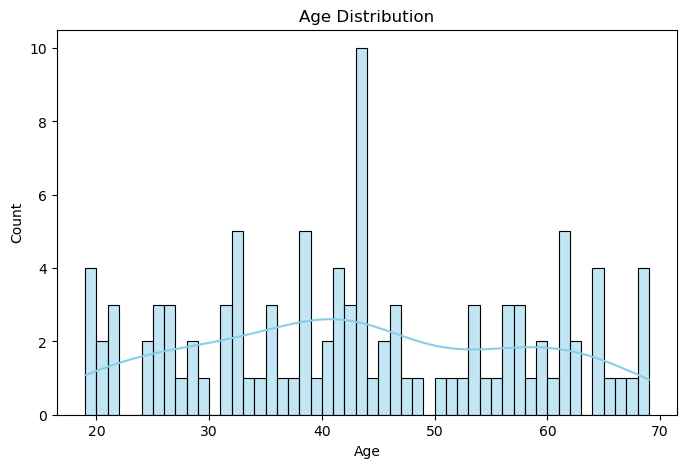

In [220]:
#Age Distribution - Histogram
plt.figure(figsize =(8,5))
sns.histplot(df['Age'], bins=50, kde = True, color ='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

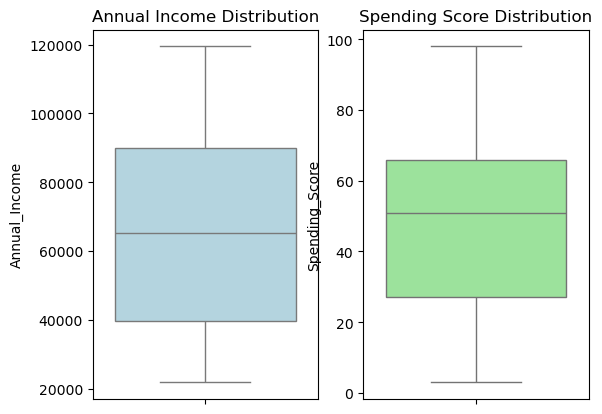

In [226]:
#Annual Income & Spending Score - Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(y = df['Annual_Income'], color = 'lightblue')
plt.title('Annual Income Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(y = df['Spending_Score'], color =  'lightgreen')
plt.title('Spending Score Distribution')
plt.show()

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_18036\1481231217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =  df['Preferred_Category'], palette = 'coolwarm')


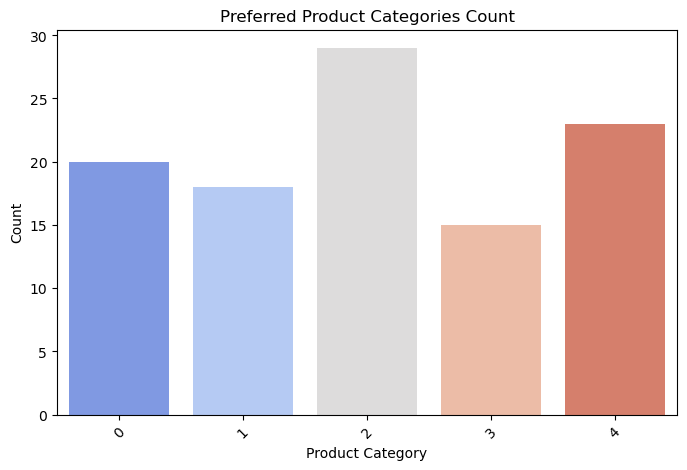

In [230]:
#Preferred Category Count - Bar Plot
plt.figure(figsize=(8,5))
sns.countplot(x =  df['Preferred_Category'], palette = 'coolwarm')
plt.title('Preferred Product Categories Count')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

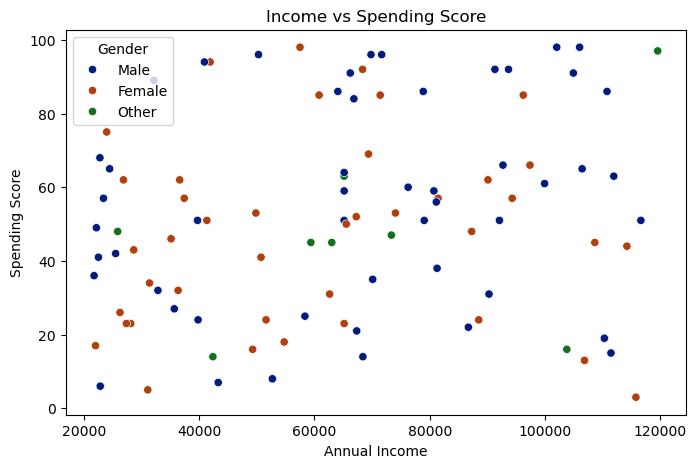

In [240]:
#Income vs Spending Score - Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Annual_Income"], y=df["Spending_Score"], hue=df["Gender"], palette="dark")
plt.title("Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


C:\Users\WELCOME\AppData\Local\Temp\ipykernel_18036\1664492962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['Gender'], y = df['Spending_Score'], palette = 'deep')


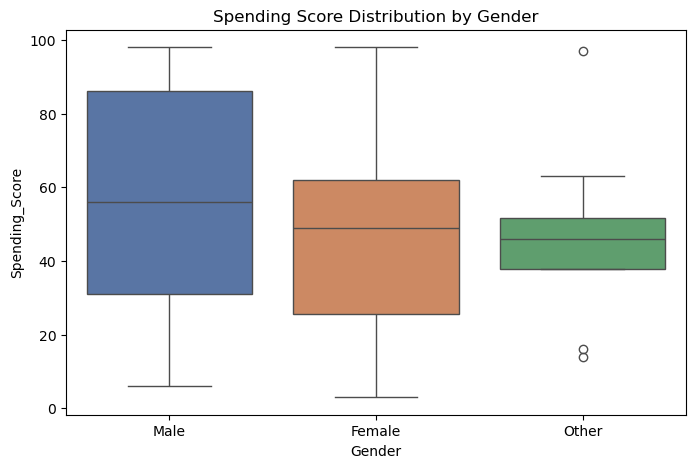

In [244]:
#Gender vs Spending Score - Box Plot
plt.figure(figsize = (8, 5))
sns.boxplot(x = df['Gender'], y = df['Spending_Score'], palette = 'deep')
plt.title("Spending Score Distribution by Gender")
plt.show()

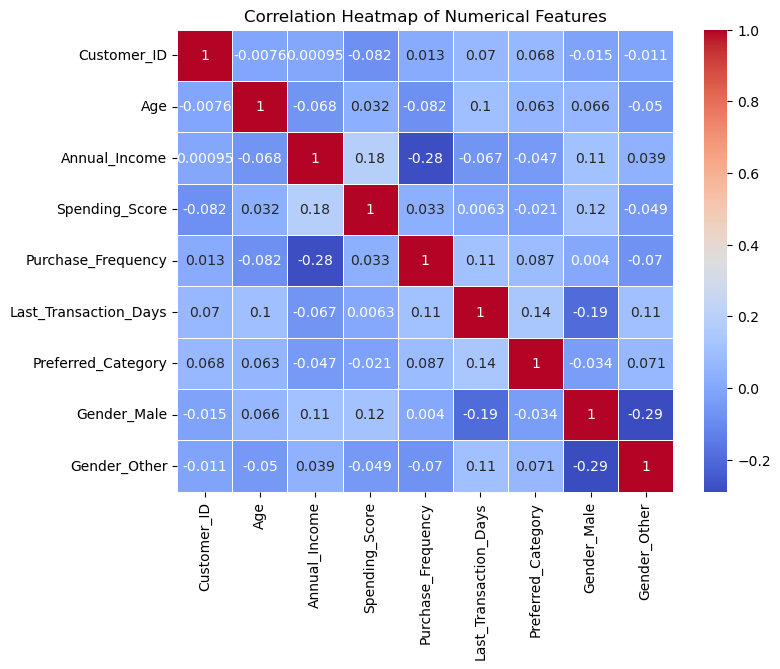

In [248]:
#Correlation Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(df_encoded.corr(), annot = True, cmap = 'coolwarm', linewidths =  0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

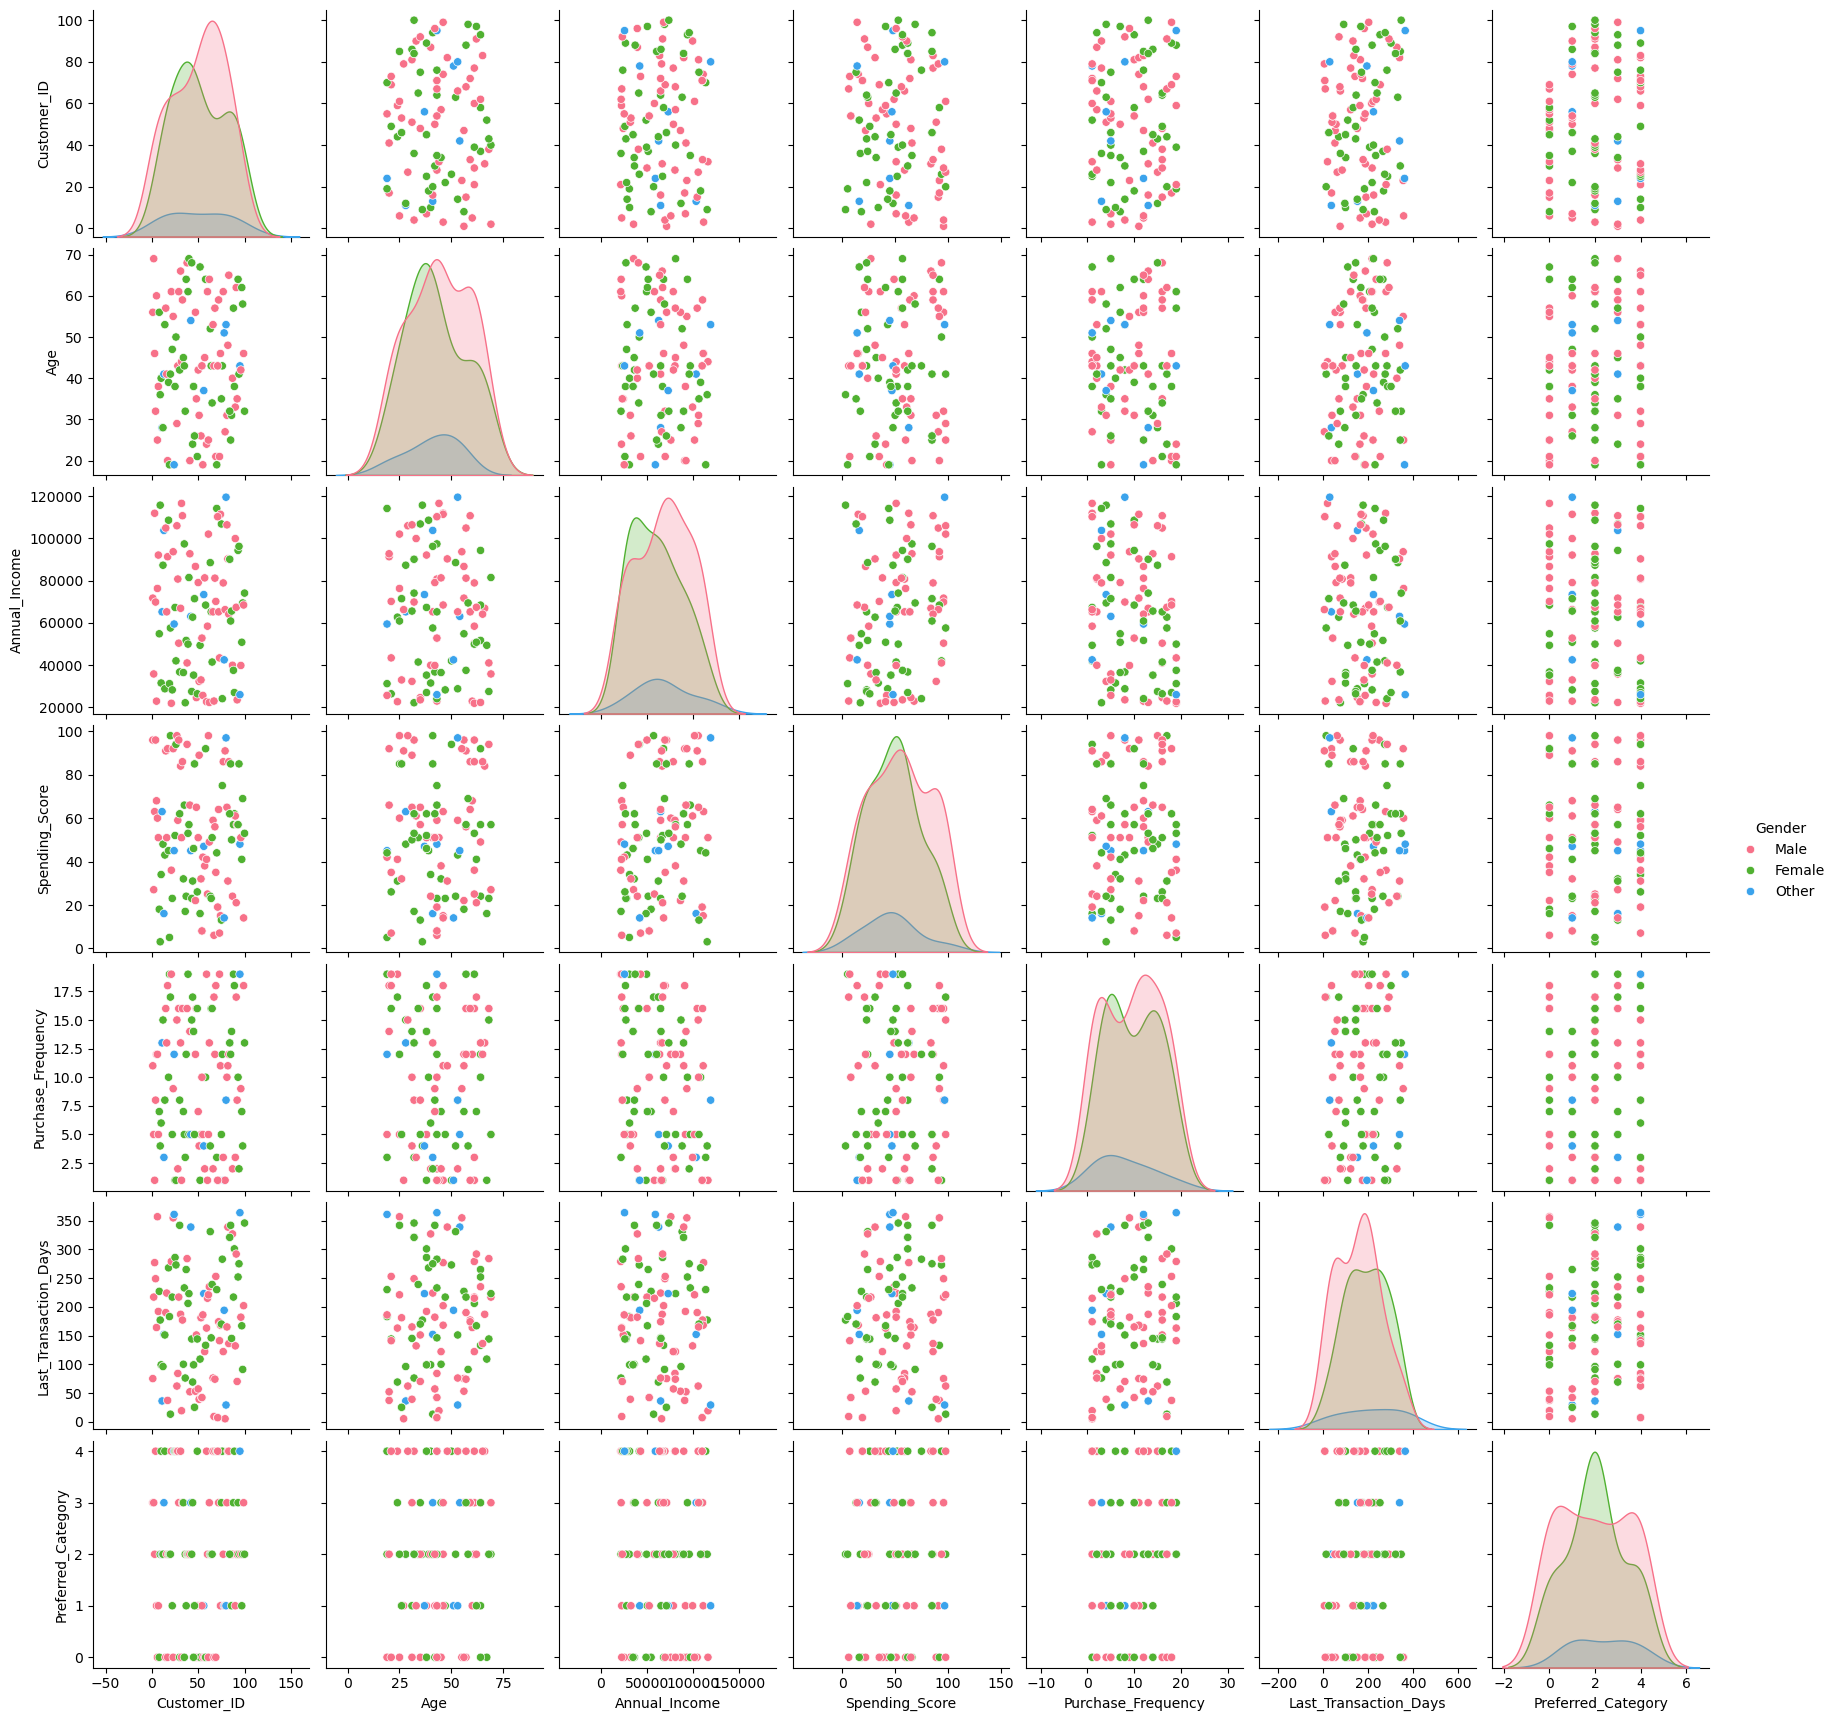

In [255]:
#pairplot
sns.pairplot(df, hue = 'Gender', palette = 'husl')
plt.show()

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_18036\2096838645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df_ltd['Customer_Loyalty_Score'], palette = 'bright', order = ['High', 'Medium', 'Low'])


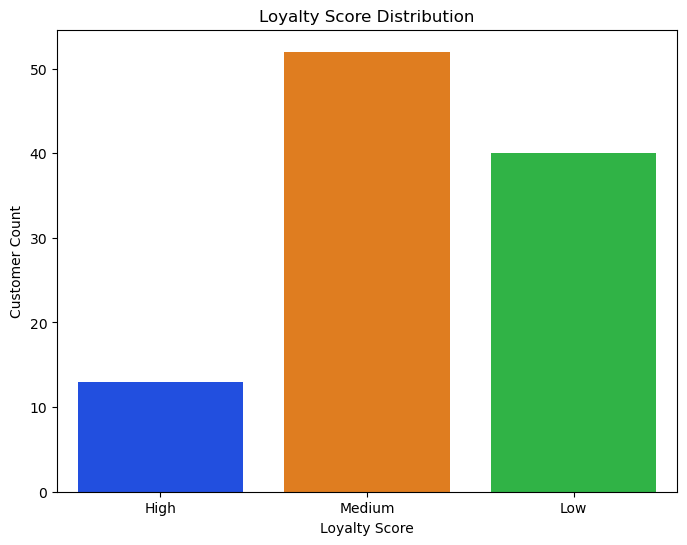

In [257]:
#Loyalty Score Distribution - Bar Plot
plt.figure(figsize = (8, 6))
sns.countplot(x = df_ltd['Customer_Loyalty_Score'], palette = 'bright', order = ['High', 'Medium', 'Low'])
plt.title("Loyalty Score Distribution")
plt.xlabel("Loyalty Score")
plt.ylabel("Customer Count")
plt.show()

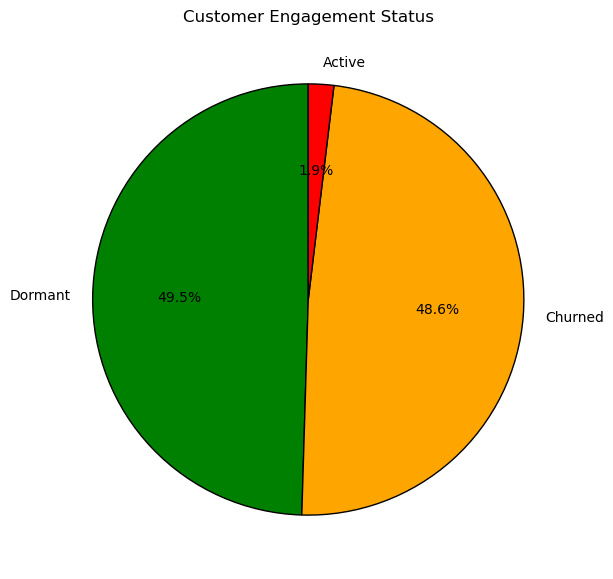

In [261]:
#Engagement Status - Pie Chart
plt.figure(figsize = (7, 7))
engagement_counts = df_ltd["Engagement_Level"].value_counts()
engagement_counts.plot(kind="pie", autopct="%1.1f%%", colors=["green", "orange", "red"], startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Customer Engagement Status")
plt.ylabel("")
plt.show()

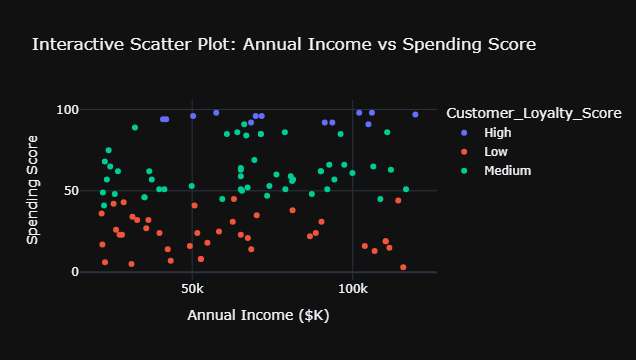

In [269]:
#Interactive Customer Segmentation - Scatter Plot
import plotly.express as px
fig = px.scatter(
    df_ltd,
    x="Annual_Income",
    y="Spending_Score",
    color="Customer_Loyalty_Score",
    hover_data=["Customer_ID", "Annual_Income", "Spending_Score", "Customer_Loyalty_Score"],
    title="Interactive Scatter Plot: Annual Income vs Spending Score",
    labels={"Annual_Income": "Annual Income ($K)", "Spending_Score": "Spending Score"},
    template="plotly_dark"
)
fig.show()